# Принятие решений в бизнесе

**Описание проекта:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Описание данных:**

Файл `/datasets/hypothesis.csv`. 

 - `Hypothesis` — краткое описание гипотезы;
 
 - `Reach` — охват пользователей по 10-балльной шкале;
 
 - `Impact` — влияние на пользователей по 10-балльной шкале;
 
 - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
 
 - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.



Файл `/datasets/orders.csv`. 

 - `transactionId` — идентификатор заказа;
 
 - `visitorId` — идентификатор пользователя, совершившего заказ;
 
 - `date` — дата, когда был совершён заказ;
 
 - `revenue` — выручка заказа;
 
 - `group` — группа A/B-теста, в которую попал заказ.
 
Файл   `/datasets/visitors.csv`. 

 - `date` — дата
 
 - `group` — группа A/B-теста;
 
 - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [1]:
#Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime as dt
from matplotlib.dates import date2num
import datetime
from scipy import stats as st
import seaborn as sns
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 1

Сохраним данные файла в переменную `hypothesis`

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv.csv') 
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

Получим общую информацию о таблице

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице `hypothesis` 5 столбцов и 9 строк. Приведем названия столбцов к нижнему регистру.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ice'] = round(hypothesis['ice'], 3)
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6.

На первом месте оказалась гипотеза под номером 7, поскольку параметр reach = 10, в то время, как у других гипотез он меньше. На втором месте гипотеза под номером 2, поскольку параметр reach = 8, а confidence = 7. Шестая гипотеза также осталась на четвертом месте. 

Вывод: проведена приоритизация гипотез. Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6. Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6. На первом месте по RICE оказалась гипотеза под номером 7, поскольку параметр reach = 10, в то время, как у других гипотез он меньше: охват меняет приоритезацию.

## Предобработка данных

### Обзор данных

Прочитаем файлы и сохраним их в переменные `orders` и `visitors`

In [8]:
# Прочитаем файлы и сохраним их в переменные orders и visitors
try:
    orders = pd.read_csv('/datasets/orders.csv') 
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/visitors.csv')       

Выведем общую информацию о таблицах и первые 5 строк

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице `orders` 1197 строк и 5 столбцов. Cтолбец `date` представлен типом данных `object`, его следует привести к типу `datetime`. Пропуски отсутствуют.

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице `visitors` 3 столбца и 62 строки. Столбец `date` представлен типом данных `object`, его следует привести к типу `datetime`. Пропуски отсутствуют.

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Вывод:** произведен первичный обзор данных. 

 - В таблице `orders` 1197 строк и 5 столбцов. Cтолбец `date` представлен типом данных `object`(в предобработке приведем к нужному типу). Пропуски отсутствуют.    

 - В таблице `visitors` 3 столбца и 62 строки. Столбец `date` представлен типом данных `object` (в предобработке приведем к нужному типу). Пропуски отсутствуют.

### Предобработка данных

In [13]:
#Приведем столбцы `date` к типу `datetime`

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
#Проверим данные на дубликаты
orders.duplicated().sum()

0

In [16]:
visitors.duplicated().sum()

0

В таблицах `orders` и `visitors` дубликаты отсутствуют. 

Проверим, есть ли в данных пользователи, попавшие в обе группы.

In [17]:
#находим уникальных пользователей из группы А и сохраняем их id в переменную users_a
users_a = orders.query("group=='A'")['visitorId'].drop_duplicates()

In [18]:
#Находим количество всех пользователей из группы А
len(users_a)

503

In [19]:
#находим уникальных пользователей из группы B и сохраняем их id в переменную users_b
users_b = orders.query("group=='B'")['visitorId'].drop_duplicates()

In [20]:
#Находим количество всех пользователей из группы B
len(users_b)

586

In [21]:
#Находим пользователей, попавших в обе группы и сохраняем их в переменную users_ab
users_ab = users_a[users_a.isin(users_b)]

In [22]:
#Находим количество пользователей, попавших в обе группы
len(users_ab)

58

10% или 58 пользователей содержатся в обеих группах.

**Вывод:** проведена предобработка данных. Примерно 10% или 58 пользователей попали в обе группы теста. 10% - достаточно весомый процент для удаления, исключим их на этапе анализа результатов теста по "очищенным" данным.

## Анализ A/B-теста

### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [24]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах.

Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`. Вычислим максимальную дату. Для группы тоже рассчитаем максимум

In [25]:
orders_agg= datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1
).sort_values(by=['date','group'])

In [26]:
visitors_agg = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Объединим обе таблицы в одну с понятными названиями столбцов:

In [27]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

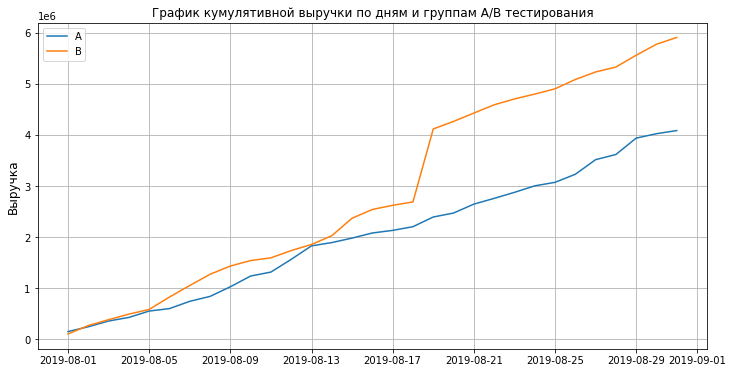

In [29]:
#Задаём сетку отрисовки графиков
plt.figure(figsize=(12, 6))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по дням и группам А/В тестирования')
plt.ylabel('Выручка', fontsize=12)
plt.grid(True)
plt.legend(); 

Выручка увеличивается в течение всего теста. 19 августа 2019 года произошел резкий скачок выручки (похоже на выброс, или ошибку). 

Построим график кумулятивного прироста посетителей

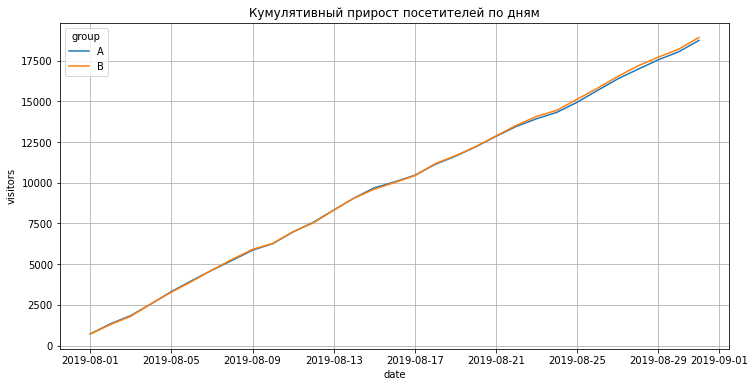

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulativeData, x='date', y='visitors', hue='group')
plt.title('Кумулятивный прирост посетителей по дням')
plt.grid(True)
plt.show()

Количество посетителей увеличивается в течение всего теста. На дату 19 августа 2019 года резкий скачок отсутствует.

### График кумулятивного среднего чека по группам.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

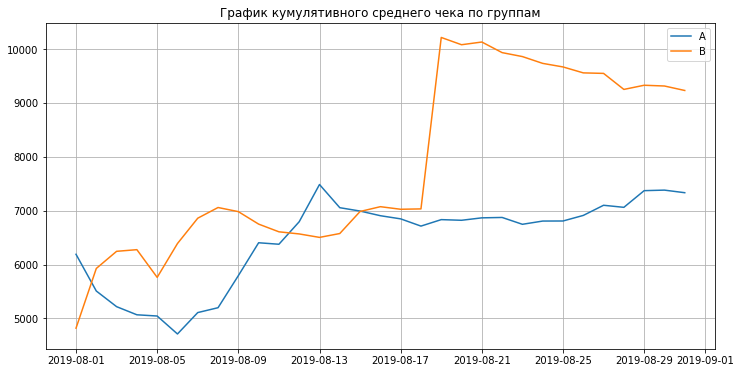

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.grid(True)
plt.legend();

**Вывод:** 

Средний чек для группы B рос неравномерно: на графике видны пики и падения. В августе средний чек вырос в 1.4 раза с 7000 у.е. до значения 10000 у.е., и до конца теста снижался равномерно к значению 9100 у.е.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

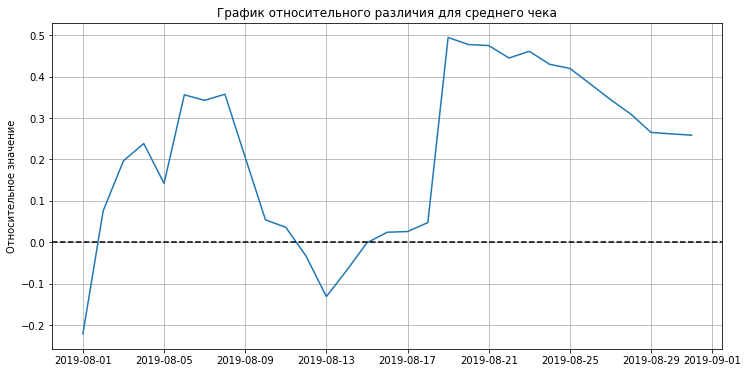

In [32]:
plt.figure(figsize=(12, 6))

# собираем данные в одном датафрейме
cum_revenue_ab = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(cum_revenue_ab['date'], \
         (cum_revenue_ab['revenueB']/cum_revenue_ab['ordersB'])/(cum_revenue_ab['revenueA']/cum_revenue_ab['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия для среднего чека')
plt.ylabel('Относительное значение')
plt.grid(True)
plt.show();

В начале теста и в середине теста средний чек группы B был ниже, чем в группе А. Остальное время средний чек группы B был практически всегда выше. 19 августа 2019 года наблюдался резкий скачок среднего чека группы В.

### График кумулятивного среднего количества заказов на посетителя по группам

Проанализируем график кумулятивной конверсии.

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [34]:
# считаем среднюю конверсию через неделю 
print(cumulativeDataA.query('date > "2019-08-07"')['conversion'].mean())
print(cumulativeDataB.query('date > "2019-08-07"')['conversion'].mean())
print(cumulativeData.query('date > "2019-08-07"')['conversion'].mean())

0.03002538268319994
0.034359199346079984
0.03219229101463996


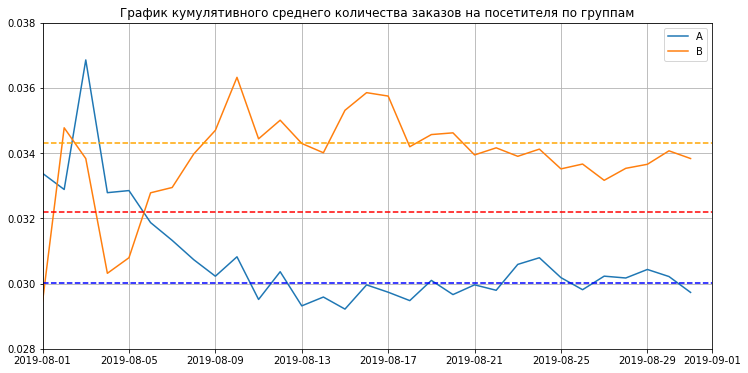

In [35]:

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.axhline(y=0.0322, color='red', linestyle='--')
plt.axhline(y=0.0343, color='orange', linestyle='--')
plt.axhline(y=0.030025, color='blue', linestyle='--')

plt.legend()
# Преобразование строковых дат в объекты datetime
start_date = datetime.datetime.strptime('2019-08-01', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2019-09-01', '%Y-%m-%d')

# Преобразование datetime в числовой формат
start_num = date2num(start_date)
end_num = date2num(end_date)

# задаем масштаб осей
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.grid(True)
plt.axis([start_num, end_num, 0.028, 0.038]);

В начале недели кумулятивная конверсия группы A превышала конверсию группы B. Примерно 6 августа конверсии обеих групп сравнялись, и в последствии конверсия группы B превышала конверсию группы А до конца теста, где конверсии обеих групп зафиксировались около своих средних значений. Для начала тестирования характерны колебания. К середине теста показатели стабилизировались.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного различия кумулятивных конверсий:

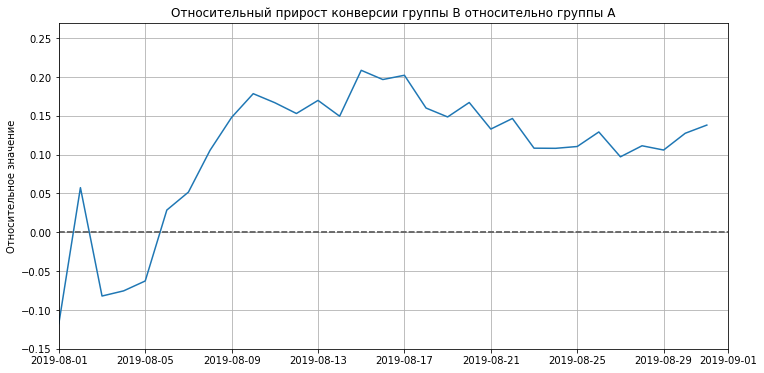

In [36]:
plt.figure(figsize=(12, 6))
cum_conversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(
    cum_conversions['date'],\
    cum_conversions['conversionB']/cum_conversions['conversionA']-1,
)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0, color='grey', linestyle='--')

plt.title('Относительный прирост конверсии группы В относительно группы А')
plt.ylabel('Относительное значение')
plt.axis([start_num, end_num, -0.15, 0.27]) 
plt.grid(True)

plt.show();

В первый день теста группа B значительно проигрывала группе A; на второй день конверсия группы B немного превысила значения группы А, а на третий день опять упала. Начиная примерно с 6 дня теста рост конверсии группы B возобновился и к концу теста стабилизировался, уже значительно превышая показатели группы А.

### Точечный график количества заказов по пользователям.

In [37]:
# создадим таблицу с подсчетом заказов на одного пользователя
users_orders = orders.groupby('visitorId').agg({'transactionId' : 'count'}).rename(columns={'transactionId':'orders'})
users_orders = users_orders.sort_values(by='orders', ascending=False).reset_index()

#добавим порядковый номер, соответствующий рейтингу пользователя по количеству заказов
users_orders['n'] = range(1, len(users_orders) + 1)
users_orders['orders'] = users_orders['orders'].astype(int)
users_orders

,visitorId,orders,n
0,4256040402,11,1
1,2458001652,11,2
2,2378935119,9,3
3,2038680547,8,4
4,199603092,5,5
...,...,...,...
1026,1484903144,1,1027
1027,1485964287,1,1028
1028,1494664757,1,1029
1029,1495112755,1,1030


Строим точечный график.

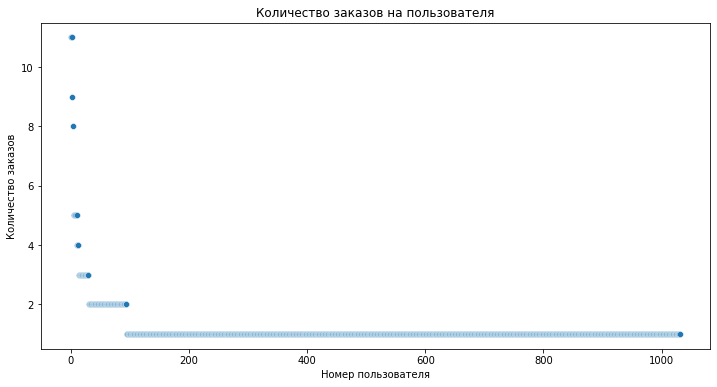

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=users_orders, x='n', y='orders')
plt.title('Количество заказов на пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Номер пользователя')
plt.show()

In [39]:
print('Кол-во пользователей с двумя и более заказами:', users_orders.query('orders >= 2')['visitorId'].count())
print('Кол-во уникальных пользователей:', users_orders['visitorId'].nunique())
print('Доля пользователей с двумя и более заказами:',\
      (100 * users_orders.query('orders >= 2')['visitorId'].count() / users_orders['visitorId'].nunique()),'%')

Кол-во пользователей с двумя и более заказами: 94
Кол-во уникальных пользователей: 1031
Доля пользователей с двумя и более заказами: 9.117361784675072 %


**Вывод:** 9.11% пользователей сделали два и более заказов.

### 95-й и 99-й перцентили количества заказов на пользователя

Определим 91, 95 и 99 перцентили количества заказов на пользователя.

In [40]:
np.percentile(users_orders['orders'], [91, 95, 99])

array([2., 2., 4.])

Не более 9% пользователей совершили 2 и более заказов, и не более 1% пользователей совершили 4 заказа; отнесем пользователей, совершивших 4 и более заказов к аномальным.

### Точечный график стоимостей заказов.

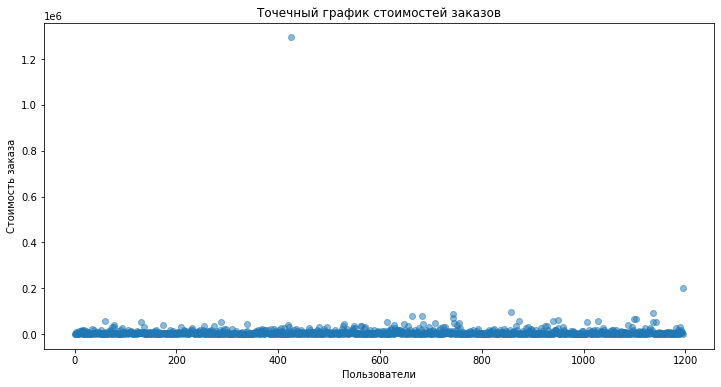

In [41]:
plt.figure(figsize=(12, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show();

По графику видно: есть один аномально дорогой заказ. Предположительно, именно этот заказ показал скачок на графиках кумулятивного среднего чека и выручки.

###  95-й и 99-й перцентили стоимости заказов.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Примем за верхнюю границу аномальные заказы дороже 58000 руб.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным - без удаления аномальных пользователей.

Сформулируем гипотезы:

H0: различий в среднем количестве заказов на посетителя между группами нет.

H1: различия в среднем количестве заказов на посетителя между группами существуют.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [43]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [44]:
#Из изначальной таблицы orders для пользователей группы А посчитаем кол-во заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
#для пользователей группы B посчитаем кол-во заказов
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
   0, index=np.arange(cumulativeData.query('group =="A"')['visitors'].max() - len(ordersByUsersA['orders'])), name='orders'
)],axis=0)


In [46]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(cumulativeData.query('group =="B"')['visitors'].max()- len(ordersByUsersB['orders'])), name='orders'
)],axis=0) 

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.

В sampleA мы сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке `sampleA` методом `mean()`. Аналогично найдём среднее группы B:`SampleB.mean()`.

Выведем относительный прирост среднего числа заказов группы B: `среднее число заказов группы B / среднее число заказов группы A - 1. Округлим до трёх знаков после запятой`.

In [47]:
print('P-value: ', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value:  0.017
Относительный прирост:  0.138


Отвергаем нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами существуют.
Относительный прирост группы B равен 13.8%.    

**Вывод:** по результатам проверки гипотезы есть основания полагать, что: различия в среднем количестве заказов на посетителя между группами существуют. Относительный прирост группы B равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы:

H0: различий в среднем чеке между группами нет.

H1: различия в среднем чеке  между группами существуют.

Передадим критерию mannwhitneyu() данные о выручке с заказов.

Найдём относительные различия в среднем чеке между группами:

In [48]:
print('P-value: ', '{0:.3f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))
print('Относительный прирост: ', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
)) 

P-value:  0.729
Относительный прирост:  0.259


**Вывод:** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Узнаем, сколько всего аномальных пользователей атрибутом `shape.`

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= int(np.percentile(users_orders['orders'], [99])) ]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= int(np.percentile(users_orders['orders'], [99])) ]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64
20


Всего 20 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста, но сначала подготовим выборки количества заказов по пользователям по группам теста.

In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group =="A"')['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group =="B"')['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [51]:
print('P-value: ', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


P-value:  0.014
Относительный прирост:  0.151


По очищенным данным отвергаем нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами существуют. Относительный прирост группы B равен 14.9%.

Узнаем, как их действия повлияли на результаты теста 10% пользователей, попавших в обе группы, а также пользователи, попавшие в выборосы:

In [52]:
excluded_users = pd.concat([users_ab, abnormalUsers])

sampleAFiltered2 = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(excluded_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group =="A"')['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered2 = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(excluded_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group =="B"')['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [53]:
print('P-value: ', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered2, sampleBFiltered2)[1]))
print('Относительный прирост: ', '{0:.3f}'.format(sampleBFiltered2.mean()/sampleAFiltered2.mean()-1)) 

P-value:  0.010
Относительный прирост:  0.164


По данным, очищенным от выбросов, а также пользователей, попавших в обе группы результаты статистического теста заключают, что существует статистически значимая разница в среднем количестве заказов на посетителя между группами. Относительный прирост группы B составил 16.4%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [54]:
print(
    'P-value: ', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост: ', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value:  0.959
Относительный прирост:  -0.014


P-value увеличился: нет причин отвергать нулевую гипотезу. Средний чек группы B стал почти равен среднему чеку группы A.

Посмотрим на результаты статистического теста на данных очищенных от аномальных пользователей, а также от пользователей, попавших в обе группы.

In [55]:
print(
    'P-value: ', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(excluded_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(excluded_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост: ', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(excluded_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(excluded_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value:  0.901
Относительный прирост:  -0.032


После очистки данных от аномальных пользователей, и пользователей, попавших в обе группы по результатам статистического теста статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным отсутствует. Средний чек группы B немного ниже среднего чека группы A.

### Решение по результатам теста. 

**Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Выявлена статистически значимая разница в среднем количестве заказов на посетителя между группами; при этом статистически значимая разница между средними чеками отсутствует. 

Такой же результат получен и для очищенных данных.  Есть смысл признать победу в группе В, а также и остановить тест.

## Общий вывод:

<p></p>

<div style="border:solid green 2px; padding: 20px">  
    
  **Работа проведена в два этапа:** 

 - первый этап: анализ 9 гипотез по увеличению выручки интернет-магазина с применением фреймворков ICE и RICE.
    
    
 - второй этап: А/В-тестирование и анализ результатов.
    
    
**Выводы по первому этапу проекта:**   
    
    Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6. Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6. На первом месте по RICE оказалась гипотеза под номером 7, поскольку параметр reach = 10, в то время, как у других гипотез он меньше.

**Выводы по второму этапу проекта:**       
    
    
 **1. Обзор данных.**
    
 - В таблице `orders` 1197 строк и 5 столбцов. Cтолбец `date` представлен типом данных `object`. Пропуски отсутствуют.    

 - В таблице `visitors` 3 столбца и 62 строки. Столбец `date` представлен типом данных `object`. Пропуски отсутствуют.
    
 
 **2. Предобработка данных.**
    
Произведена предобработка данных. 
Столбец `date` в таблицах `visitors` и `orders`приведен к типу даты. Дубликаты отсутствуют.
    
    
 **3.  Анализ А/Б теста.**
    
 - На графике кумулятивной выручки наблюдается рост в течение всего теста. 19 августа 2019 года произошел резкий скачок выручки.
    
 - Количество посетителей увеличивается в течение всего теста. На дату 19 августа 2019 года резкий скачок отсутствует.
    
 - Средний чек для группы B рос неравномерно: на графике видны пики и падения. В августе средний чек вырос в 1.4 раза с 7000 у.е. до значения 10000 у.е., и до конца теста снижался равномерно к значению 9100 у.е. 
    
 - В начале теста и в середине теста средний чек группы B был ниже, чем в группе А. Остальное время средний чек группы B был практически всегда выше. 19 августа 2019 года наблюдался резкий скачок среднего чека группы В.    
    
 - В начале недели кумулятивная конверсия группы A превышала конверсию группы B. Примерно 6 августа конверсии обеих групп сровнялись, и в последствии конверсия группы B превышала конверсию группы А до конца теста, где конверсии обеих групп зафиксировались около своих средних значений.   

 - В первый день теста группа B значительно проигрывала группе A; на второй день конверсия группы B немного превысила значения группы А, а на третий день опять упала. Начиная примерно с 6 дня теста рост конверсии группы B возобновился и к концу теста стабилизировался, уже значительно превышая показатели группы А.
  
    - Кол-во пользователей с двумя и более заказами: 94
    - Кол-во уникальных пользователей: 1031
    - Доля пользователей с двумя и более заказами: 9.117361784675072 %  
    
 - Не более 9% пользователей совершили 2 и более заказов, и не более 1% пользователей совершили 4 заказа; пользователи, совершившие 4 и более заказов отнесены к аномальным.
    
 - По точечному графику стоимости заказов обнаружен один аномально дорогой заказ. Есть основания полагать, именно этот заказ показал скачок на графиках кумулятивного среднего чека и выручки.  
 
 - Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Приняты за верхнюю границу аномальные заказы дороже 58000 руб.
    
 - по результатам проверки гипотезы на сырых данных есть основания полагать, что: различия в среднем количестве заказов на посетителя между группами существуют. Относительный прирост группы B равен 13.8%  
    
 - по результатам проверки гипотезы на сырых данных есть основания полагать: различия в среднем чеке не существуют. При этом, средний чек группы B значительно выше среднего чека группы A.    
    
 - по результатам проверки гипотезы на очищенных данных есть основания полагать: различия в среднем количестве заказов на посетителя между группами существуют. Относительный прирост группы B равен 14.9%.   
    
 - по результатам проверки гипотезы на данных, очищенных от выбросов, а также пользователей, попавших в обе группы есть основания полагать: существует статистически значимая разница в среднем количестве заказов на посетителя между группами. Относительный прирост группы B составил 16.4%
    
 - по результатам проверки гипотезы на очищенных данных есть основания полагать: различия в среднем чеке не существуют. Средний чек группы B стал почти равен среднему чеку группы A.    
    
 - по результатам проверки гипотезы на данных, очищенных от выбросов, а также пользователей, попавших в обе группы есть основания полагать, что статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным отсутствует. Относительный прирост среднего чека группы B немного ниже среднего чека группы A.   
    
 - Принято решение признать победу в группе В, а также и остановить тест.   
    
</div>  